In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("daily_data.csv")

In [3]:
data['Dates'] = pd.to_datetime(data['Dates'])
data = data.set_index('Dates')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2013-12-13 to 2017-10-20
Data columns (total 5 columns):
Soybean     971 non-null float64
Corn        971 non-null float64
CrudeOil    971 non-null float64
DXY         971 non-null float64
S&P500      971 non-null float64
dtypes: float64(5)
memory usage: 45.5 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83a0ce0470>,
      dtype=object)

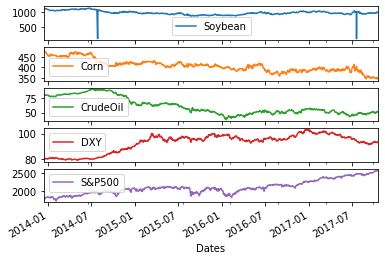

In [5]:
data.plot(subplots=True)

In [6]:
to_keep = data[data['Soybean']>500].index
value = data.loc[to_keep, 'Soybean'].mean()
data['Soybean'].loc[(data['Soybean']<500)] = pd.np.nan
data['Soybean'] = data['Soybean'].interpolate()

In [7]:
#to_keep = data[data['Soybean']>500].index
#value = data.loc[to_keep, 'Soybean'].mean()
#data['Soybean'].loc[(data['Soybean']<500)] = value

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83c80bd128>,
      dtype=object)

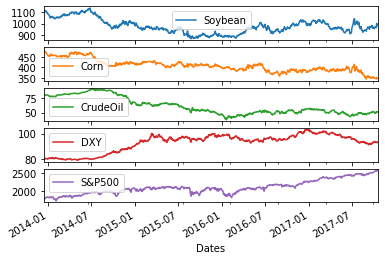

In [8]:
data.plot(subplots=True)

In [9]:
data.head()

,Soybean,Corn,CrudeOil,DXY,S&P500
Dates,,,,,
2013-12-13,1101.75,489.50,80.46,80.209999,1775.319946
2013-12-16,1106.50,479.25,80.78,80.070000,1786.540039
2013-12-17,1109.00,474.75,80.91,80.059998,1781.000000
2013-12-18,1103.75,474.50,80.25,80.110001,1810.650024
2013-12-19,1107.25,472.00,79.90,80.629997,1809.599976


In [10]:
print("Soybean: [", data['Soybean'].min(), ";", data['Soybean'].max(), "]")
print("Corn: [", data['Corn'].min(), ";", data['Corn'].max(), "]")
print("Crude Oil: [", data['CrudeOil'].min(), ";", data['CrudeOil'].max(), "]")
print("DXY: [", data['DXY'].min(), ";", data['DXY'].max(), "]")
print("S&P500: [", data['S&P500'].min(), ";", data['S&P500'].max(), "]")

Soybean: [ 867.75 ; 1135.75 ]
Corn: [ 344.5 ; 489.5 ]
Crude Oil: [ 38.22 ; 90.06 ]
DXY: [ 79.139999 ; 103.290001 ]
S&P500: [ 1741.890015 ; 2575.209961 ]


In [11]:
BuyHold_Soybean = data['Soybean'] / float(data['Soybean'][:1]) -1
BuyHold_Corn = data['Corn'] / float(data['Corn'][:1]) -1
BuyHold_CrudeOil = data['CrudeOil'] / float(data['CrudeOil'][:1]) -1
BuyHold_DXY = data['DXY'] / float(data['DXY'][:1]) -1
BuyHold_SP = data['S&P500'] / float(data['S&P500'][:1]) -1
BuyHold_20Each = 0.2 * (BuyHold_Soybean + BuyHold_Corn + BuyHold_CrudeOil + BuyHold_DXY + BuyHold_SP)

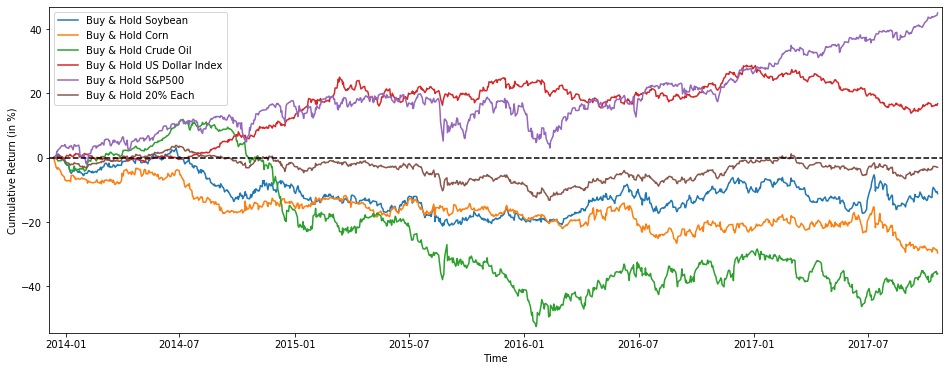

In [12]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_Soybean*100,     label='Buy & Hold Soybean')
plt.plot(BuyHold_Corn*100,    label='Buy & Hold Corn')
plt.plot(BuyHold_CrudeOil*100,  label='Buy & Hold Crude Oil')
plt.plot(BuyHold_DXY*100,    label='Buy & Hold US Dollar Index')
plt.plot(BuyHold_SP*100,    label='Buy & Hold S&P500')
plt.plot(BuyHold_20Each*100, label='Buy & Hold 20% Each')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [13]:
Soybean1Y = data['Soybean'] / data['Soybean'].shift(252) -1
Corn1Y = data['Corn'] / data['Corn'].shift(252) -1
CrudeOil1Y = data['CrudeOil'] / data['CrudeOil'].shift(252) -1
DXY1Y = data['DXY'] / data['DXY'].shift(252) -1
SP1Y = data['S&P500'] / data['S&P500'].shift(252) -1
Each201Y = 0.2 * (Soybean1Y + Corn1Y + CrudeOil1Y + DXY1Y + SP1Y)

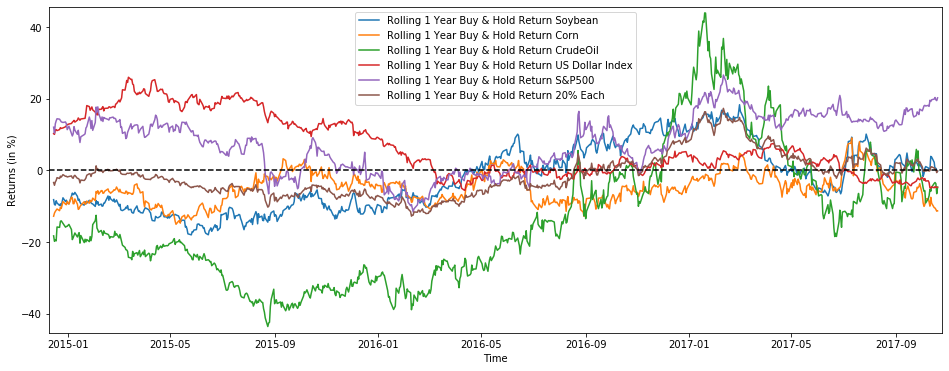

In [14]:
plt.figure(figsize=(16,6))
plt.plot(Soybean1Y*100,     label='Rolling 1 Year Buy & Hold Return Soybean')
plt.plot(Corn1Y*100,    label='Rolling 1 Year Buy & Hold Return Corn')
plt.plot(CrudeOil1Y*100,  label='Rolling 1 Year Buy & Hold Return CrudeOil')
plt.plot(DXY1Y*100,    label='Rolling 1 Year Buy & Hold Return US Dollar Index')
plt.plot(SP1Y*100,    label='Rolling 1 Year Buy & Hold Return S&P500')
plt.plot(Each201Y*100, label='Rolling 1 Year Buy & Hold Return 20% Each')
plt.xlabel('Time')
plt.ylabel('Returns (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()

In [15]:
marr      = 0 #minimal acceptable rate of return (usually equal to the risk free rate)
Soybean1YS     = (Soybean1Y.mean()    -marr) /Soybean1Y.std()
Corn1YS    = (Corn1Y.mean()   -marr) /Corn1Y.std()
CrudeOil1YS    = (CrudeOil1Y.mean()   -marr) /CrudeOil1Y.std()
DXY1YS  = (DXY1Y.mean() -marr) /DXY1Y.std()
SP1YS    = (SP1Y.mean()   -marr) /SP1Y.std()
Each201YS = (Each201Y.mean()-marr) /Each201Y.std()

print('Soybean 1 Year Buy & Hold Sharpe Ratio =',round(Soybean1YS,2))
print('Corn 1 Year Buy & Hold Sharpe Ratio =',round(Corn1YS,2))
print('Crude Oil 1 Year Buy & Hold Sharpe Ratio =',round(CrudeOil1YS,2))
print('US Dollar Index 1 Year Buy & Hold Sharpe Ratio =',round(DXY1YS,2))
print('SP500 1 Year Buy & Hold Sharpe Ratio =',round(SP1YS,2))
print('20% Each 1 Year Buy & Hold Sharpe Ratio =',round(Each201YS,2))

Soybean 1 Year Buy & Hold Sharpe Ratio = -0.22
Corn 1 Year Buy & Hold Sharpe Ratio = -1.15
Crude Oil 1 Year Buy & Hold Sharpe Ratio = -0.75
US Dollar Index 1 Year Buy & Hold Sharpe Ratio = 0.8
SP500 1 Year Buy & Hold Sharpe Ratio = 1.0
20% Each 1 Year Buy & Hold Sharpe Ratio = -0.21


In [16]:
from scipy.optimize import minimize

def multi(x):
    a, b, c, d, e = x
    return a, b, c, d, e #the "optimal" weights we wish to discover

def maximize_sharpe(x): #objective function
    weights = (Soybean1Y*multi(x)[0] + Corn1Y*multi(x)[1]
               + CrudeOil1Y*multi(x)[2] + DXY1Y*multi(x)[3]
               + SP1Y*multi(x)[4])
    return -(weights.mean()/weights.std())

def constraint(x): #since we're not using leverage nor short positions
    return 1 - (multi(x)[0]+multi(x)[1]+multi(x)[2]+multi(x)[3]+multi(x)[4])

cons = ({'type':'ineq','fun':constraint})
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1))
initial_guess = (1, 0, 0, 0, 0) #this algorithm (SLSQP) easly gets stuck on a local
# optimal solution, genetic algorithms usually yield better results
# so my inital guess is close to the global optimal solution

ms = minimize(maximize_sharpe, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

msBuyHoldAll = (BuyHold_Soybean*ms.x[0] + BuyHold_Corn*ms.x[1]
                + BuyHold_CrudeOil*ms.x[2] + BuyHold_DXY*ms.x[3]
                + BuyHold_SP*ms.x[4])

msBuyHold1yAll = (Soybean1Y*ms.x[0] + Corn1Y*ms.x[1]
               + CrudeOil1Y*ms.x[2] + DXY1Y*ms.x[3]
               + SP1Y*ms.x[4])


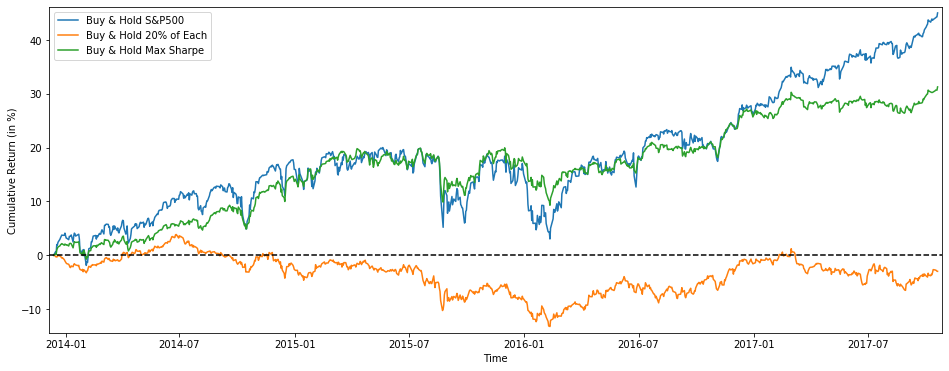

Soybean Weight = 2.9 %
Corn Weight = 0.0 %
Crude Oil Weight = 0.0 %
US Dollar Index Weight = 42.94 %
SP500 Weight = 54.16 %

Sharpe = 1.258

Median yearly excess return over SP500 = -1.8 %
Median yearly excess return over Equall Weights  = 9.1 %


In [17]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold S&P500')
plt.plot(BuyHold_20Each*100, label='Buy & Hold 20% of Each')
plt.plot(msBuyHoldAll*100,   label='Buy & Hold Max Sharpe')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Soybean Weight =',round(ms.x[0]*100,2),'%')
print('Corn Weight =',round(ms.x[1]*100,2),'%')
print('Crude Oil Weight =',round(ms.x[2]*100,2),'%')
print('US Dollar Index Weight =',round(ms.x[3]*100,2),'%')
print('SP500 Weight =',round(ms.x[4]*100,2),'%')
print()
print('Sharpe =',round(msBuyHold1yAll.mean()/msBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over SP500 =',round((msBuyHold1yAll.median()-SP1Y.median())*100,1),'%')
print('Median yearly excess return over Equall Weights  =',round((msBuyHold1yAll.median()-Each201Y.median())*100,1),'%')

In [18]:
def maximize_median_yearly_return(x): #different objective function
    weights = (Soybean1Y*multi(x)[0] + Corn1Y*multi(x)[1]
               + CrudeOil1Y*multi(x)[2] + DXY1Y*multi(x)[3]
               + SP1Y*multi(x)[4])
    return -(float(weights.median()))

mm = minimize(maximize_median_yearly_return, initial_guess, method='SLSQP',
              bounds=bnds, constraints=cons, options={'maxiter': 10000})

mmBuyHoldAll = (BuyHold_Soybean*mm.x[0] + BuyHold_Corn*mm.x[1]
                + BuyHold_CrudeOil*mm.x[2] + BuyHold_DXY*mm.x[3]
                + BuyHold_SP*mm.x[4])

mmBuyHold1yAll = (Soybean1Y*mm.x[0] + Corn1Y*mm.x[1]
               + CrudeOil1Y*mm.x[2] + DXY1Y*mm.x[3]
               + SP1Y*mm.x[4])

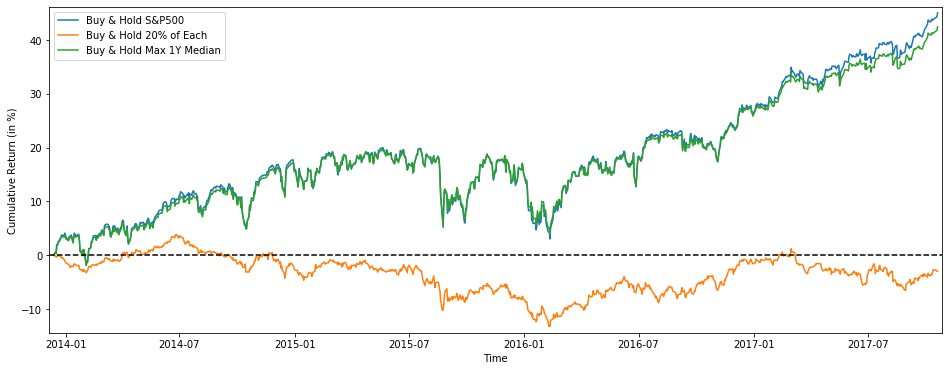

Soybean Weight = 0.0 %
Corn Weight = 0.0 %
Crude Oil Weight = 0.65 %
US Dollar Index Weight = 7.24 %
SP500 Weight = 92.11 %

Sharpe = 1.039

Median yearly excess return over SP500 = 0.2 %
Median yearly excess return over Equall Weights  = 11.0 %


In [19]:
plt.figure(figsize=(16,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold S&P500')
plt.plot(BuyHold_20Each*100, label='Buy & Hold 20% of Each')
plt.plot(mmBuyHoldAll*100,   label='Buy & Hold Max 1Y Median')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Soybean Weight =',round(mm.x[0]*100,2),'%')
print('Corn Weight =',round(mm.x[1]*100,2),'%')
print('Crude Oil Weight =',round(mm.x[2]*100,2),'%')
print('US Dollar Index Weight =',round(mm.x[3]*100,2),'%')
print('SP500 Weight =',round(mm.x[4]*100,2),'%')
print()
print('Sharpe =',round(mmBuyHold1yAll.mean()/mmBuyHold1yAll.std(),3))
print()
print('Median yearly excess return over SP500 =',round((mmBuyHold1yAll.median()-SP1Y.median())*100,1),'%')
print('Median yearly excess return over Equall Weights  =',round((mmBuyHold1yAll.median()-Each201Y.median())*100,1),'%')

In [20]:
YTD_Soybean = data['Soybean'][-252:] / float(data['Soybean'][-252]) -1
YTD_Corn = data['Corn'][-252:] / float(data['Corn'][-252]) -1
YTD_CrudeOil = data['CrudeOil'][-252:] / float(data['CrudeOil'][-252]) -1
YTD_DXY = data['DXY'][-252:] / float(data['DXY'][-252]) -1
YTD_SP = data['S&P500'][-252:] / float(data['S&P500'][-252]) -1
YTD_20Each = 0.2 * (YTD_Soybean + YTD_Corn + YTD_CrudeOil + YTD_DXY + YTD_SP)

YTD_max_sharpe = YTD_Soybean*ms.x[0] + YTD_Corn*ms.x[1] + YTD_CrudeOil*ms.x[2] + YTD_DXY*ms.x[3] +YTD_SP*ms.x[4]
YTD_max_median = YTD_Soybean*mm.x[0] + YTD_Corn*mm.x[1] + YTD_CrudeOil*mm.x[2] + YTD_DXY*mm.x[3] +YTD_SP*mm.x[4]

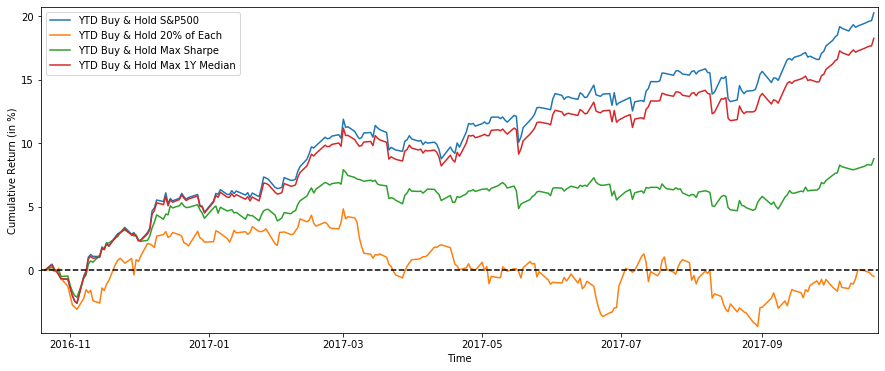

Buy & Hold S&P500 YTD Performance = 20.3 %
Buy & Hold 20% of Each YTD Performance = -0.5 %
Buy & Hold Max Sharpe YTD Performance = 8.8 %
Buy & Hold Max 1Y Median YTD Performance = 18.3 %


In [21]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100,         label='YTD Buy & Hold S&P500')
plt.plot(YTD_20Each*100,     label='YTD Buy & Hold 20% of Each')
plt.plot(YTD_max_sharpe*100, label='YTD Buy & Hold Max Sharpe')
plt.plot(YTD_max_median*100, label='YTD Buy & Hold Max 1Y Median')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Buy & Hold S&P500 YTD Performance =',round(float(YTD_SP[-1:]*100),1),'%')
print('Buy & Hold 20% of Each YTD Performance =',round(float(YTD_20Each[-1:]*100),1),'%')
print('Buy & Hold Max Sharpe YTD Performance =',round(float(YTD_max_sharpe[-1:]*100),1),'%')
print('Buy & Hold Max 1Y Median YTD Performance =',round(float(YTD_max_median[-1:]*100),1),'%')

In [22]:
data['SPRet']    = data['S&P500'] /data['S&P500'].shift(1)-1
data['DXYRet']   = data['DXY']   /data['DXY'].shift(1)  -1

data['Strat'] = data['SPRet'] * 0.8 + data['DXYRet'] * 0.2
data['Strat'][SP1Y.shift(1)  > -0.17] = data['DXYRet']*0 + data['SPRet']*1
data['Strat'][DXY1Y.shift(1) > 0.29]  = data['DXYRet']*1 + data['SPRet']*0

DynAssAll    = data['Strat'].cumsum()
DynAssAll1y  = data['Strat'].rolling(window=252).sum()
DynAssAllytd = data['Strat'][-252:].cumsum()

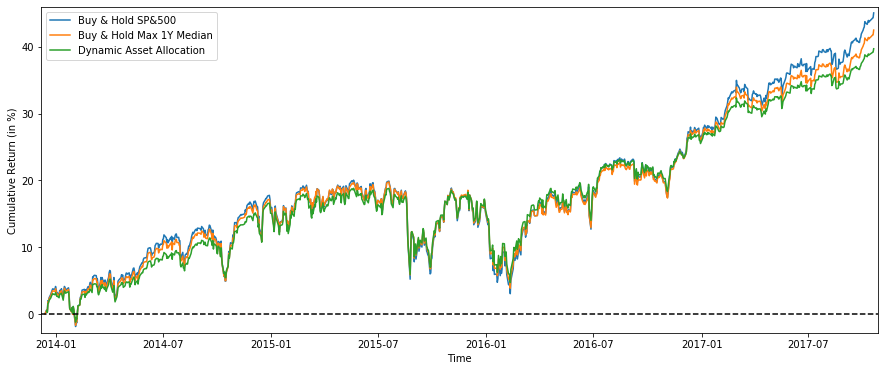

Median yearly excess return over SP500 = 1.0 %
Median yearly excess return over Max 1Y Median   = 0.9 %


In [23]:
plt.figure(figsize=(15,6))
plt.plot(BuyHold_SP*100,     label='Buy & Hold SP&500')
plt.plot(mmBuyHoldAll*100,   label='Buy & Hold Max 1Y Median')
plt.plot(DynAssAll*100,      label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Median yearly excess return over SP500 =',round(float(DynAssAll1y.median()-SP1Y.median())*100,1),'%')
print('Median yearly excess return over Max 1Y Median   =',round(float(DynAssAll1y.median()-mmBuyHold1yAll.median())*100,1),'%')

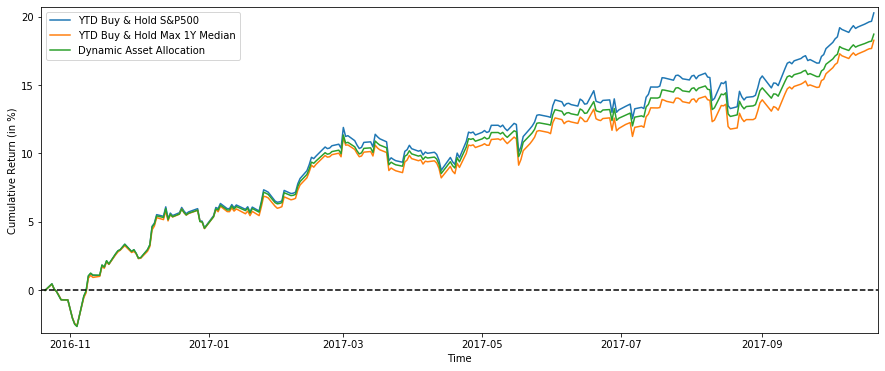

Buy & Hold S&P500 YTD Performance = 20.3 %
Buy & Hold Max 1Y Median YTD Performance = 18.3 %
Strategy YTD Performance = 18.7 %


In [24]:
plt.figure(figsize=(15,6))
plt.plot(YTD_SP*100,         label='YTD Buy & Hold S&P500')
plt.plot(YTD_max_median*100, label='YTD Buy & Hold Max 1Y Median')
plt.plot(DynAssAllytd*100,   label='Dynamic Asset Allocation')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (in %)')
plt.margins(x=0.005,y=0.02)
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', color='k')
plt.legend()
plt.show()
print('Buy & Hold S&P500 YTD Performance =',round(float(YTD_SP[-1:]*100),1),'%')
print('Buy & Hold Max 1Y Median YTD Performance =',round(float(YTD_max_median[-1:]*100),1),'%')
print('Strategy YTD Performance =',round(float(DynAssAllytd[-1:]*100),1),'%')